# Part 1: Feature Normalization

#### Get the data

In [1]:
import os
import pandas as pd

# load housing data
housing_file = os.path.join('Housing_data.txt')
file_data = open(housing_file, 'r')
data = pd.read_csv(file_data, names=['Size', 'Bedrooms', 'Price'])

data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Display data in a Scatter Plot

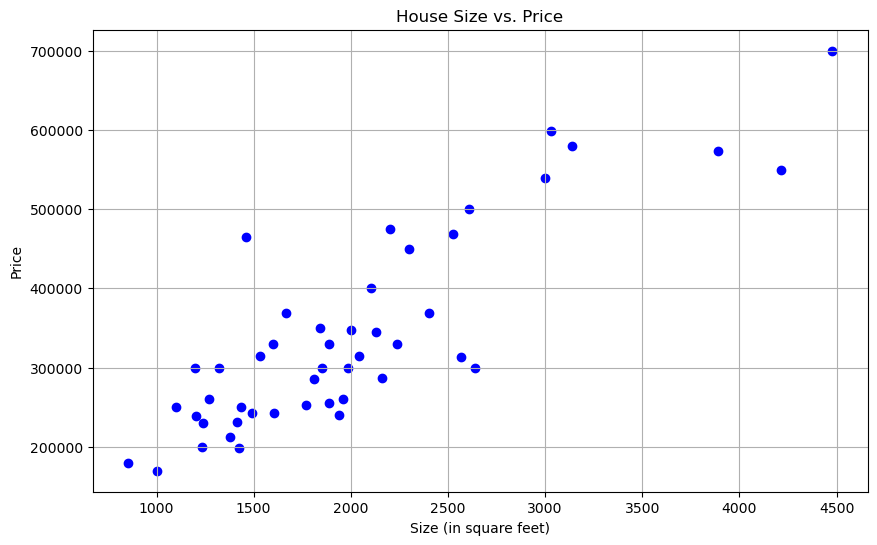

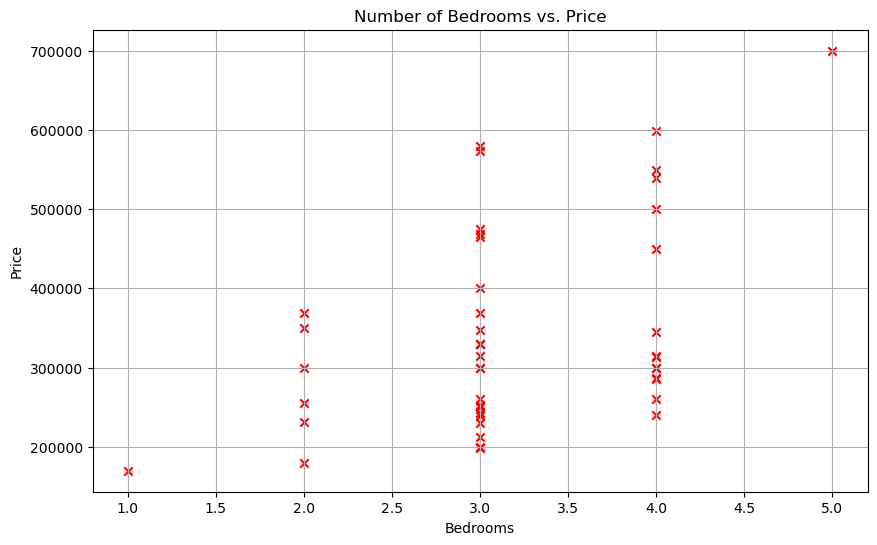

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'], c='blue', marker='o')
plt.title('House Size vs. Price')
plt.xlabel('Size (in square feet)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Bedrooms'], data['Price'], c='red', marker='x')
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()



#### Scale features and set them to zero mean
1. First, for each feature dimension, compute the mean of the feature and subtract it from the dataset.  
2. Next, compute the standard deviation of each feature and divide
3. Next, You need to perform the normalization separately for each feature. 

In [3]:
# Store for predictions later
size_mean = data['Size'].mean()
size_std = data['Size'].std()
bedrooms_mean = data['Bedrooms'].mean()
bedrooms_std = data['Bedrooms'].std()

for col_index in range(0, len(data.columns)-1):
    col_data = data.iloc[:,col_index]
    col_data = (col_data - col_data.mean())/col_data.std()
    data.iloc[:,col_index] = col_data

data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


# Part 2: Cost and Gradient descent

In [4]:
import numpy as np

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;
m = len(data)

#### Init Theta and Run Gradient Descent 

In [5]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.
    """
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    
    return J

X = np.column_stack((np.ones(data.shape[0]), data[['Size', 'Bedrooms']].values))
y = data['Price'].values
theta = np.zeros(X.shape[1])
print(X.shape, y.shape, theta.shape)

(47, 3) (47,) (3,)


#### Compute and display the initial cost with theta initialized to zeros

In [6]:
initial_cost = compute_cost(X, y, theta)
print(f'Initial cost: {initial_cost}')

#Perform a single gradient step on the parameter thetas. 
for t in range(len(theta)):
    partial_derivative = (1 / m) * np.sum((np.dot(X, theta) - y) * X[:,t])
    theta[t] = theta[t] - alpha * partial_derivative

print(f'Cost after one iteration: {compute_cost(X, y, theta)}')


Initial cost: 65591548106.45744
Cost after one iteration: 64301053653.610435


#### Perform Gradient Descent
- After updating theta, compute the cost of using the current values of theta to fit the data points
- You should set J_history(iter) to the cost of using the current values of theta. 
- Save the cost J in every iteration  

In [7]:
J_history = np.zeros(iterations)

for iter in range(iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    theta_temp = theta.copy()
    for t in range(len(theta)):
        partial_derivative = (1 / m) * np.sum(errors * X[:,t])
        theta_temp[t] = theta[t] - alpha * partial_derivative
    
    theta = theta_temp
    
    J_history[iter] = compute_cost(X, y, theta)
    print(f'Cost after {iter + 1} iterations: {J_history[iter]}')


Cost after 1 iterations: 63037086680.040535
Cost after 2 iterations: 61799391613.00513
Cost after 3 iterations: 60587408637.749725
Cost after 4 iterations: 59400590227.752594
Cost after 5 iterations: 58238400865.17558
Cost after 6 iterations: 57100316767.94081
Cost after 7 iterations: 55985825623.269196
Cost after 8 iterations: 54894426327.521095
Cost after 9 iterations: 53825628732.18339
Cost after 10 iterations: 52778953395.85096
Cost after 11 iterations: 51753931342.055435
Cost after 12 iterations: 50750103822.79645
Cost after 13 iterations: 49767022087.635544
Cost after 14 iterations: 48804247158.21631
Cost after 15 iterations: 47861349608.0769
Cost after 16 iterations: 46937909347.62572
Cost after 17 iterations: 46033515414.15372
Cost after 18 iterations: 45147765766.75993
Cost after 19 iterations: 44280267086.07041
Cost after 20 iterations: 43430634578.63347
Cost after 21 iterations: 42598491785.87719
Cost after 22 iterations: 41783470397.5183
Cost after 23 iterations: 4098521006

#### Plot Convergence Graph

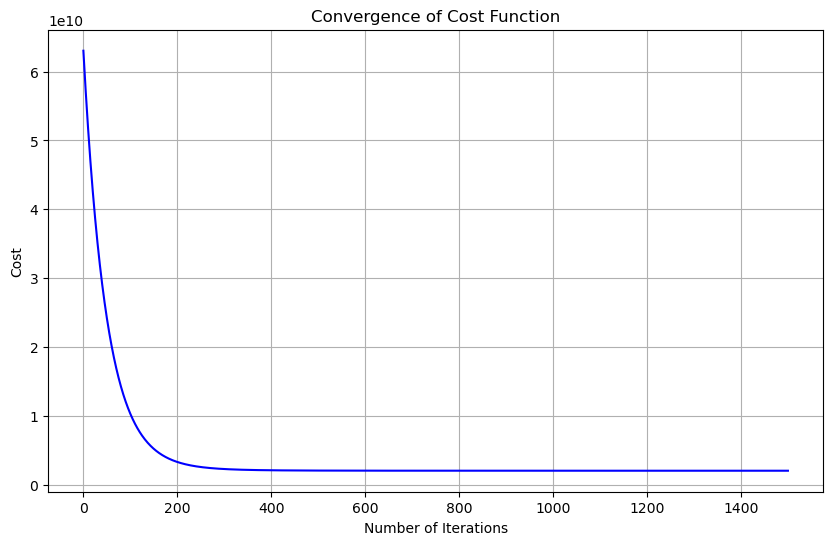

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), J_history, color='blue')
plt.title('Convergence of Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


# Part 3: Estimate
Estimate the price of a 1650 sq-ft, 3 br house

In [9]:
sq_ft = 1650
bedrooms = 3

# Feature normalization
size_normalized = (sq_ft - size_mean) / size_std
bedrooms_normalized = (bedrooms - bedrooms_mean) / bedrooms_std


# Predicting the price using the trained model
price_prediction = np.dot([1, size_normalized, bedrooms_normalized], theta)
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price_prediction:.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293100.97
